# Libraries

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

# Dataset

## Load

In [3]:
# Load the dfset.
df = pd.read_csv("../data/sales_sentiment_analysis.csv")

# Let's see how many rows we got.
print(f"Number of individuals in the dataset: {len(df)} \nand number of features: {len(df.columns)}")

# Let's print the first 5 rows of our dataframe.
df.head()

Number of individuals in the dataset: 1465 
and number of features: 16


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
# The datasets contains  columns and 1465 rows.
# The information cames from India, because the prices are in Rupees.

# Data pre processing.

- Changing Data Types of Columns from object to Floats.
- Filling in Missing Information.
- Checking For Duplicate Rows.
- Splitting Long Strings.
- Creating Various New Columns.

In [5]:
# Check the columns names.
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
# Check the columns types.
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [7]:
# Discounted price, actual price and discount percentage, rating and rating count should be float.
# Let's check the issue for each column.

In [8]:
# Here we see that, there is a "," and the rupee symbol.
df['actual_price'].head()

0    ₹1,099
1      ₹349
2    ₹1,899
3      ₹699
4      ₹399
Name: actual_price, dtype: object

In [9]:
# Here we see that, there is a "," and the rupee symbol.
df['discounted_price'].head()

0    ₹399
1    ₹199
2    ₹199
3    ₹329
4    ₹154
Name: discounted_price, dtype: object

In [10]:
# We have a value that is not a number.
df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [11]:
# We have a "," in the numbers.
df['rating_count'].head()         

0    24,269
1    43,994
2     7,928
3    94,363
4    16,905
Name: rating_count, dtype: object

In [12]:
# Let's remove the rupee symbols from actual price and discounted price.
df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')

# Now we have to remove the commas from the prices.
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')

# Now let's convert the columns to float.
df['actual_price'] = df['actual_price'].astype(float)
df['discounted_price'] = df['discounted_price'].astype(float)

In [13]:
# Let's remove the % from discount percentage.
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

# Let's convert the column to float.
df['discount_percentage'] = df['discount_percentage'].astype(float)

In [14]:
# Let's drop the row that has a "|" as value from the rating column.
df = df[df['rating'] != '|']

# Let's convert the column to float.
df['rating'] = df['rating'].astype(float)

In [15]:
# Let's remove the comma from rating count.
df['rating_count'] = df['rating_count'].str.replace(',', '')

# Let's convert the column to float.
df['rating_count'] = df['rating_count'].astype(float)

In [16]:
# Check the columns types.
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [17]:
# Everything is ok now.

In [18]:
# Let's check the missing values.
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [19]:
# Let's check for duplicates.
df.duplicated().sum()

0

# Model

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fonta\AppData\Roaming\nltk_data...


True

In [41]:
# Create an instance of the VADER sentiment analyzer.
sia = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer on each review.
df['sentiment_scores'] = df['review_content'].apply(lambda x: sia.polarity_scores(x))

# Extract the compound sentiment score from each sentiment dictionary.
df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0.5 else 'negative' if x['compound'] <= -0.5 else 'neutral')


In [39]:
# Check the mean value for sentiment == positive.
print(f"The mean value for positive comments is {df[df['sentiment'] == 'positive']['rating'].mean()}, \
        \nfor negative comments is {df[df['sentiment'] == 'negative']['rating'].mean()} \
        \nand for neutral comments is {df[df['sentiment'] == 'neutral']['rating'].mean()}")

The mean value for positive comments is 4.11743119266056,         
for negative comments is 3.9125         
and for neutral comments is 3.9250000000000007


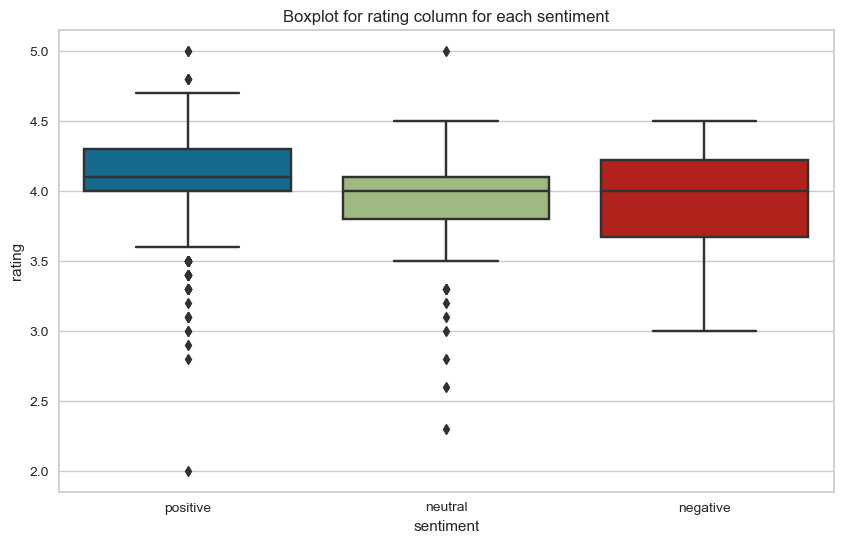

In [40]:
# Let's make a boxplot for the rating column for each sentiment.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='rating', data=df)
plt.title('Boxplot for rating column for each sentiment')
plt.show()

# Conclusion

I think the model worked pretty well for being a simple model. Positive and neutral have many outliers that should be reviewed to understand better, and negative comments have a pretty high rating, for sure there it's many world that are confusing the algorithm.